##5291 Project

### Import data

In [0]:
#authorization from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/ADA Project"

test_ver2.csv  train_clean.csv	train_ver2.csv


In [0]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#train = pd.read_csv("/content/drive/My Drive/ADA Project/train_ver2.csv")
#test = pd.read_csv("/content/drive/My Drive/ADA Project/test_ver2.csv")
train = pd.read_csv("/content/drive/My Drive/ADA Project/train_clean.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train.head(10)

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,1,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,1,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,1,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,1,I,S,N,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
train.shape

(13621268, 47)

In [0]:
train.dtypes

Unnamed: 0                 int64
fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_fin_ult1          int64
ind_ctop_f

In [0]:
train.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [0]:
train = train.rename(columns={"fecha_dato": "date", "ncodpers": "CustomerId", "ind_empleado": "EmployeeIndex", "pais_residencia": "Country",
                                 "sexo": "sex", "fecha_alta": "FirstDay", "ind_nuevo": "NewCustomer", "antiguedad": "Seniority",
                                 "indrel": "Primary", "indrel_1mes": "CustomerType", "tiprel_1mes": "CustomerRelation",
                                 "indresi": "Residence_Bank", "indext": "Birthcountry_Bank", "canal_entrada": "channel",
                                 "indfall": "DeceasedIndex", "tipodom": "AddresType", "cod_prov": "ProvinceCode", "nomprov": "ProvinceName",
                                 "ind_actividad_cliente": "ActivityIndex", "renta": "GrossIncome", "segmento": "Segmentation"})

In [0]:
train.columns

Index(['Unnamed: 0', 'date', 'CustomerId', 'EmployeeIndex', 'Country', 'sex',
       'age', 'FirstDay', 'NewCustomer', 'Seniority', 'Primary',
       'CustomerType', 'CustomerRelation', 'Residence_Bank',
       'Birthcountry_Bank', 'channel', 'DeceasedIndex', 'AddresType',
       'ProvinceCode', 'ProvinceName', 'ActivityIndex', 'GrossIncome',
       'Segmentation', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

In [0]:
EDA = train[['date', 'CustomerId', 'Country', 'sex', 'age', 'ActivityIndex', 'GrossIncome', 'Segmentation']]

In [0]:
EDA.head(10)

,date,CustomerId,Country,sex,age,ActivityIndex,GrossIncome,Segmentation
0,2015-01-28,1375586,ES,H,35,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,ES,V,23,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,ES,V,23,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,ES,H,22,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,ES,V,23,1.0,NaN,03 - UNIVERSITARIO
5,2015-01-28,1050615,ES,H,23,0.0,22220.04,03 - UNIVERSITARIO
6,2015-01-28,1050616,ES,H,23,0.0,295590.36,03 - UNIVERSITARIO
7,2015-01-28,1050617,ES,H,23,1.0,113316.66,03 - UNIVERSITARIO
8,2015-01-28,1050619,ES,H,24,0.0,NaN,03 - UNIVERSITARIO
9,2015-01-28,1050620,ES,H,23,0.0,113194.98,03 - UNIVERSITARIO


In [0]:
EDA.sex.unique()

array(['H', 'V', nan], dtype=object)

In [0]:
EDA['age'] = pd.to_numeric(EDA[EDA['age'].str.strip() != 'NA']['age'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
EDA.dtypes

date              object
CustomerId         int64
Country           object
sex               object
age              float64
ActivityIndex    float64
GrossIncome      float64
Segmentation      object
dtype: object

In [0]:
EDA.head(10)

,date,CustomerId,Country,sex,age,ActivityIndex,GrossIncome,Segmentation
0,2015-01-28,1375586,ES,H,35.0,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,ES,V,23.0,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,ES,V,23.0,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,ES,H,22.0,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,ES,V,23.0,1.0,NaN,03 - UNIVERSITARIO
5,2015-01-28,1050615,ES,H,23.0,0.0,22220.04,03 - UNIVERSITARIO
6,2015-01-28,1050616,ES,H,23.0,0.0,295590.36,03 - UNIVERSITARIO
7,2015-01-28,1050617,ES,H,23.0,1.0,113316.66,03 - UNIVERSITARIO
8,2015-01-28,1050619,ES,H,24.0,0.0,NaN,03 - UNIVERSITARIO
9,2015-01-28,1050620,ES,H,23.0,0.0,113194.98,03 - UNIVERSITARIO


In [0]:
monthly_date = EDA.date.unique()

### Distribution of Active vs Inactive Customers among Different Ages

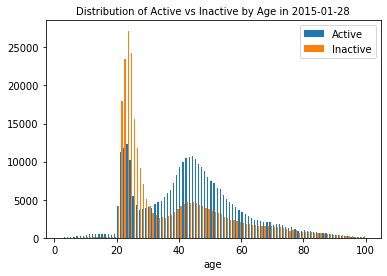

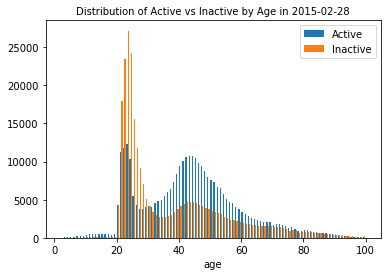

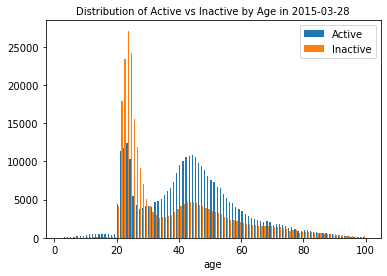

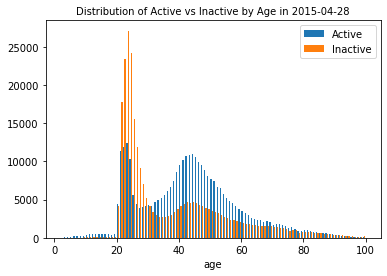

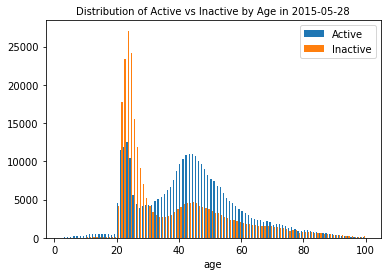

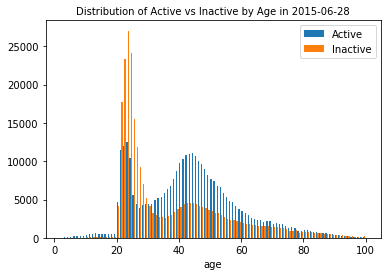

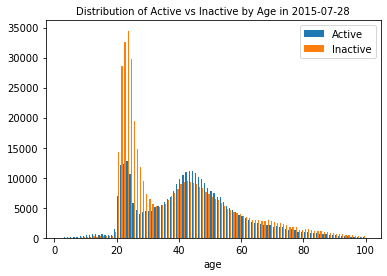

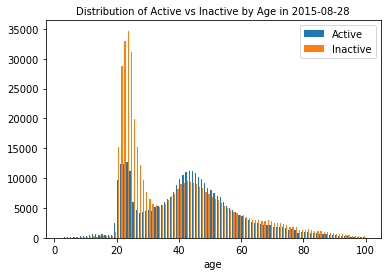

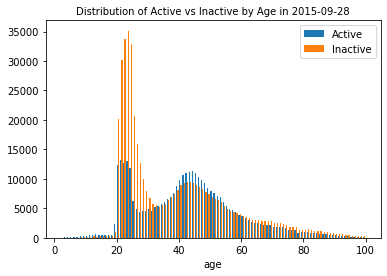

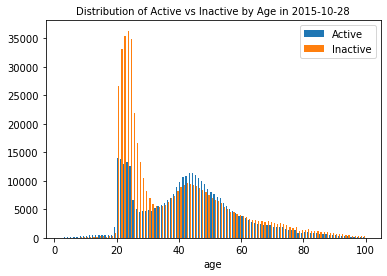

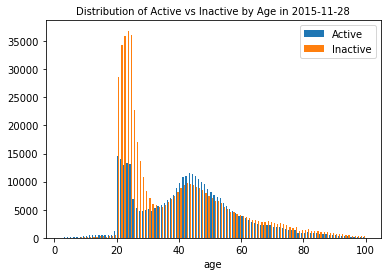

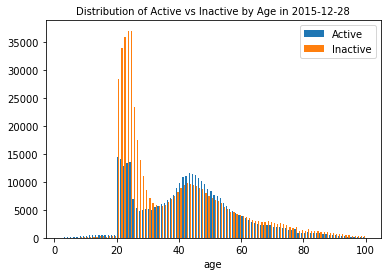

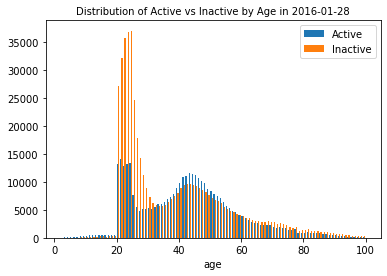

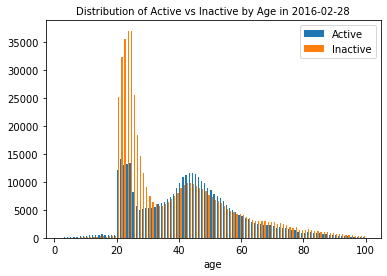

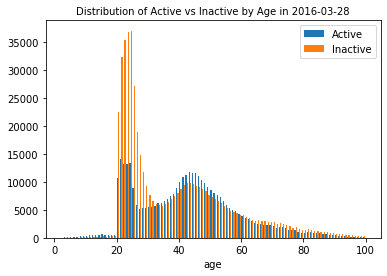

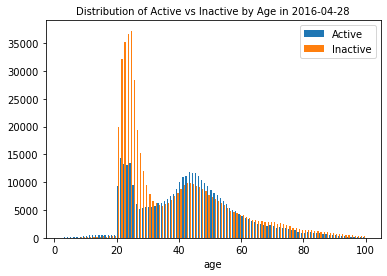

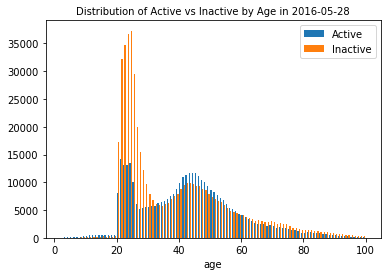

In [0]:
for date in monthly_date:
  data = EDA[EDA.date == date]
  a = data[(data.ActivityIndex == 1)&(data.age <= 100)].age
  b = data[(data.ActivityIndex == 0)&(data.age <= 100)].age
  bins = sorted(data[data.age <= 100].age.unique())

  plt.hist([a, b], bins, label=['Active', 'Inactive'])
  plt.title('Distribution of Active vs Inactive by Age in ' + date, fontsize=10, color='black')
  plt.xlabel('age')
  plt.legend(loc='upper right')
  plt.show()

In [0]:
sub1 = EDA[['date', 'CustomerId', 'sex', 'ActivityIndex']]

### Active vs Inctive Customers by Sex

In [0]:
df_a = sub1.groupby(['date', 'sex', 'ActivityIndex']).count()


In [0]:
df_a = df_a.reset_index(level=['sex','ActivityIndex','date'])

In [0]:
df_a = df_a.set_index(['sex','ActivityIndex','date'])['CustomerId'].unstack()

In [0]:
df_a = df_a.T

In [0]:
df_a

sex                 H               V        
ActivityIndex     0.0     1.0     0.0     1.0
date                                         
2015-01-28     138887  140298  146955  192239
2015-02-28     138799  141675  146856  194028
2015-03-28     138628  142966  146692  195747
2015-04-28     138296  144169  146244  197291
2015-05-28     137982  145460  145766  199077
2015-06-28     137586  146654  145281  200651
2015-07-28     222774  150976  251034  204902
2015-08-28     226393  154626  254170  207848
2015-09-28     233855  159066  260601  211737
2015-10-28     245321  162493  269149  215088
2015-11-28     250995  164227  273297  217366
2015-12-28     252594  165321  274627  219242
2016-01-28     253030  166495  275384  221103
2016-02-28     254048  167299  276808  222476
2016-03-28     254498  168634  277564  224093
2016-04-28     255118  169266  278597  224991
2016-05-28     256029  169727  279613  225775

In [0]:
#df_a.H.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
#plt.title('Distribution of Active vs Inactive Customers', fontsize=20, color='black') 
#plt.xlabel('Total number of Customer', fontsize=17, color='black') 
#plt.ylabel('Date', fontsize=17, color='black') 
#plt.legend(prop={'size':15}, loc=1)

In [0]:
#df_a.V.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
#plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
#plt.xlabel('Total number of products', fontsize=17, color='black') 
#plt.ylabel('Products_names', fontsize=17, color='black') 
#plt.legend(prop={'size':15}, loc=1)

### Active vs Inctive Customers by Levels

In [0]:
sub2 = EDA[['date', 'CustomerId', 'Segmentation', 'ActivityIndex']]
df = sub2.groupby(['date', 'Segmentation', 'ActivityIndex']).count()
df = df.reset_index(level=['Segmentation','ActivityIndex','date'])
df = df.set_index(['Segmentation','ActivityIndex','date'])['CustomerId'].unstack()

df = df.T

In [0]:
df

Segmentation  01 - TOP         ... 03 - UNIVERSITARIO       
ActivityIndex      0.0    1.0  ...                0.0    1.0
date                           ...                          
2015-01-28         304  30199  ...             152263  74749
2015-02-28         379  30467  ...             152112  75161
2015-03-28         440  30783  ...             151914  75550
2015-04-28         475  31117  ...             151696  75879
2015-05-28         475  31479  ...             151467  76241
2015-06-28         395  31759  ...             151230  76553
2015-07-28         476  31763  ...             195515  76834
2015-08-28         454  32104  ...             202293  81322
2015-09-28         539  32413  ...             206940  86031
2015-10-28         684  32872  ...             219046  91439
2015-11-28         754  33062  ...             237218  95973
2015-12-28         721  33414  ...             245822  98042
2016-01-28         691  33801  ...             248393  98615
2016-02-28         623  33998  ...             248484  98433
2016-03-28         524  34353  ...             248471  98338
2016-04-28         447  34452  ...             248665  98063
2016-05-28         380  34982  ...             248885  97481

[17 rows x 6 columns]

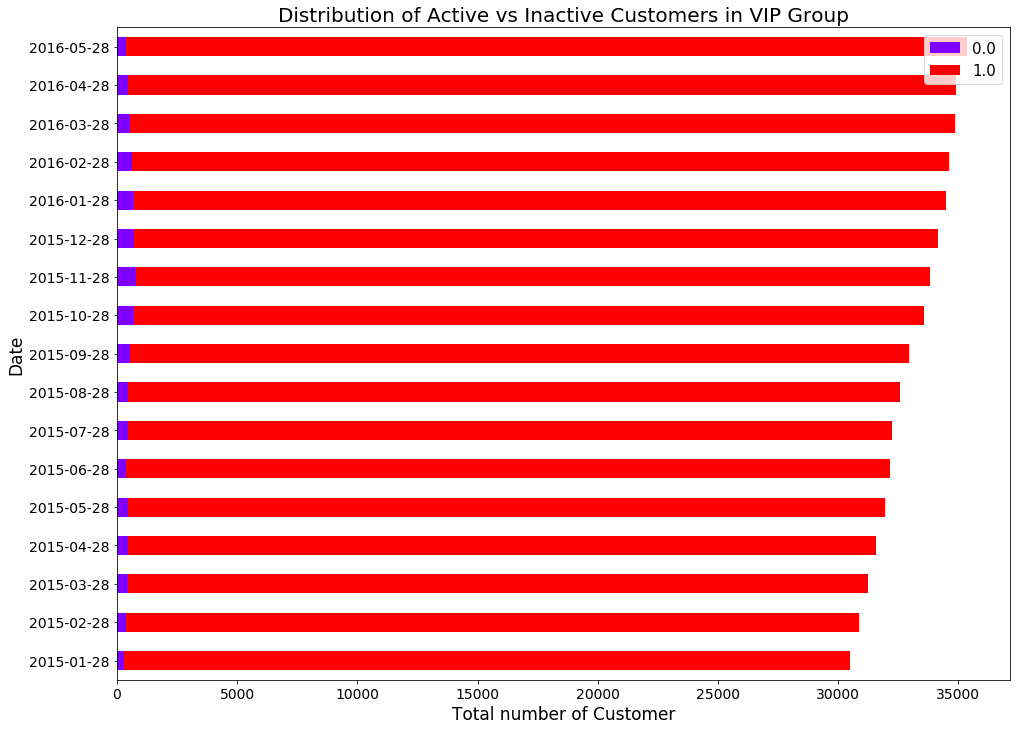

In [0]:
df['01 - TOP'].plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='rainbow')
plt.title('Distribution of Active vs Inactive Customers in VIP Group', fontsize=20, color='black') 
plt.xlabel('Total number of Customer', fontsize=17, color='black') 
plt.ylabel('Date', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1)

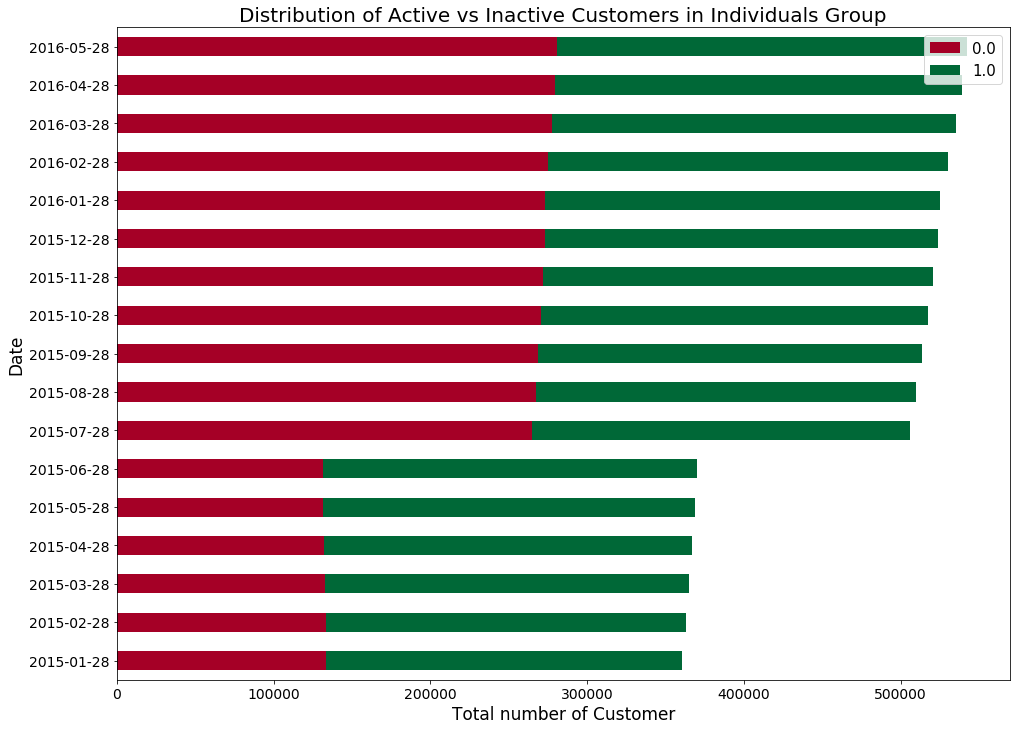

In [0]:
df['02 - PARTICULARES'].plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='RdYlGn')
plt.title('Distribution of Active vs Inactive Customers in Individuals Group', fontsize=20, color='black') 
plt.xlabel('Total number of Customer', fontsize=17, color='black') 
plt.ylabel('Date', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1)

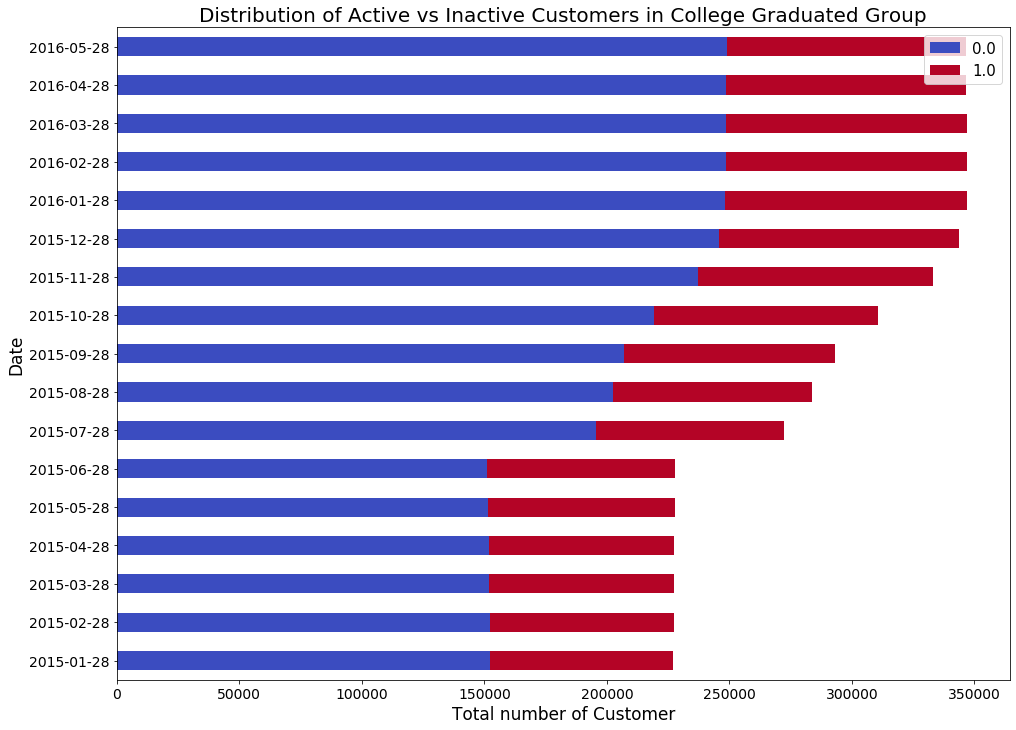

In [0]:
df['03 - UNIVERSITARIO'].plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='coolwarm')
plt.title('Distribution of Active vs Inactive Customers in College Graduated Group', fontsize=20, color='black') 
plt.xlabel('Total number of Customer', fontsize=17, color='black') 
plt.ylabel('Date', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1)

### Active vs Inactive Customers by Gross Income


In [0]:
EDA.GrossIncome

1202.73

In [0]:
EDA['Income'] = 

In [0]:
sub2 = EDA[['date', 'CustomerId', 'ActivityIndex', 'GrossIncome']]
df = sub2.groupby(['date', 'Segmentation', 'ActivityIndex']).count()
df = df.reset_index(level=['Segmentation','ActivityIndex','date'])
df = df.set_index(['Segmentation','ActivityIndex','date'])['CustomerId'].unstack()

df = df.T